In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import json
import os
import datetime

from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cairosvg
from PIL import Image

2025-01-16 12:43:55.971725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737031435.997030   30622 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737031436.004253   30622 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 12:43:56.030587: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
with open("../configs/config.json", "r") as file:
    config = json.load(file)

# Виведення конфігурації
print(config)

{'data': {'raw_path': '../data/raw/svg', 'processed_path': '../data/processed/png_images', 'class_names': ['airplane', 'alarm clock', 'angel', 'ant', 'apple', 'arm', 'armchair', 'ashtray', 'axe', 'backpack', 'banana', 'barn', 'baseball bat', 'basket', 'bathtub', 'bear (animal)', 'bed', 'bee', 'beer-mug', 'bell', 'bench', 'bicycle', 'binoculars', 'blimp', 'book', 'bookshelf', 'boomerang', 'bottle opener', 'bowl', 'brain', 'bread', 'bridge', 'bulldozer', 'bus', 'bush', 'butterfly', 'cabinet', 'cactus', 'cake', 'calculator', 'camel', 'camera', 'candle', 'cannon', 'canoe', 'car (sedan)', 'carrot', 'castle', 'cat', 'cell phone', 'chair', 'chandelier', 'church', 'cigarette', 'cloud', 'comb', 'computer monitor', 'computer-mouse', 'couch', 'cow', 'crab', 'crane (machine)', 'crocodile', 'crown', 'cup', 'diamond', 'dog', 'dolphin', 'donut', 'door', 'door handle', 'dragon', 'duck', 'ear', 'elephant', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fire hydrant', 'fish', 'flashlight', 

In [1]:
# Constants
IMAGE_SIZE = (config['model']['input_size'], config['model']['input_size'])
BATCH_SIZE = config['model']['batch_size']
NUM_CLASSES = config['model']['output_size']
DATA_DIR = config['data']['raw_path']
OUTPUT_DIR = config['data']['processed_path']

NameError: name 'config' is not defined

In [136]:
# from PIL import Image

# def convert_svg_to_png(svg_path, png_path):
#     """Конвертує SVG у PNG з обробкою альфа-каналу."""
#     try:
#         # Конвертація SVG у PNG за допомогою cairosvg
#         cairosvg.svg2png(url=svg_path, write_to=png_path)
        
#         # Відкриття PNG і перетворення на RGB з білим фоном
#         image = Image.open(png_path)
#         if image.mode == 'RGBA':
#             background = Image.new('RGB', image.size, (255, 255, 255))
#             background.paste(image, mask=image.split()[-1])  # Використовуємо альфа-канал як маску
#             image = background
#         image.save(png_path)  # Зберігаємо оновлене зображення
#         return True
#     except Exception as e:
#         print(f"Помилка конвертації {svg_path}: {e}")
#         return False

# def preprocess_dataset(data_dir, output_dir):
#     """Convert all SVGs in the dataset to PNGs and save them in the output directory."""
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     for category in os.listdir(data_dir):
#         category_dir = os.path.join(data_dir, category)
#         if os.path.isdir(category_dir):
#             output_category_dir = os.path.join(output_dir, category)
#             os.makedirs(output_category_dir, exist_ok=True)

#             for svg_file in os.listdir(category_dir):
#                 if svg_file.endswith(".svg"):
#                     svg_path = os.path.join(category_dir, svg_file)
#                     png_path = os.path.join(output_category_dir, svg_file.replace(".svg", ".png"))
#                     success = convert_svg_to_png(svg_path, png_path)
#                     if not success:
#                         print(f"Skipping {svg_path} due to conversion error.")

# # Convert SVGs to PNGs (only need to do this once)
# preprocess_dataset(DATA_DIR, OUTPUT_DIR)

In [147]:
import os

# Шлях до директорії з даними
OUTPUT_DIR = "png_images"

# Отримання списку класів
class_names = sorted(os.listdir(OUTPUT_DIR))
class_names

['airplane',
 'alarm clock',
 'angel',
 'ant',
 'apple',
 'arm',
 'armchair',
 'ashtray',
 'axe',
 'backpack',
 'banana',
 'barn',
 'baseball bat',
 'basket',
 'bathtub',
 'bear (animal)',
 'bed',
 'bee',
 'beer-mug',
 'bell',
 'bench',
 'bicycle',
 'binoculars',
 'blimp',
 'book',
 'bookshelf',
 'boomerang',
 'bottle opener',
 'bowl',
 'brain',
 'bread',
 'bridge',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cabinet',
 'cactus',
 'cake',
 'calculator',
 'camel',
 'camera',
 'candle',
 'cannon',
 'canoe',
 'car (sedan)',
 'carrot',
 'castle',
 'cat',
 'cell phone',
 'chair',
 'chandelier',
 'church',
 'cigarette',
 'cloud',
 'comb',
 'computer monitor',
 'computer-mouse',
 'couch',
 'cow',
 'crab',
 'crane (machine)',
 'crocodile',
 'crown',
 'cup',
 'diamond',
 'dog',
 'dolphin',
 'donut',
 'door',
 'door handle',
 'dragon',
 'duck',
 'ear',
 'elephant',
 'envelope',
 'eye',
 'eyeglasses',
 'face',
 'fan',
 'feather',
 'fire hydrant',
 'fish',
 'flashlight',
 'floor lamp',
 'flower

Режим зображення: RGB
Розмір зображення: (800, 800)


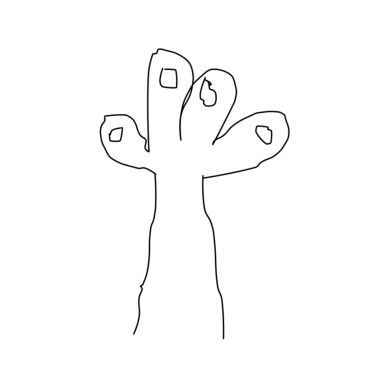

In [ ]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Шлях до директорії з зображеннями
OUTPUT_DIR = "png_images"

# Отримання списку всіх зображень
image_paths = []
for root, dirs, files in os.walk(OUTPUT_DIR):
    for file in files:
        if file.endswith(".png") or file.endswith(".jpg"):
            image_paths.append(os.path.join(root, file))

# Випадковий вибір зображення
random_image_path = random.choice(image_paths)

# Завантаження зображення
image = Image.open(random_image_path)

# Виведення інформації про зображення
print("Шлях до зображення:", random_image_path)
print("Режим зображення:", image.mode)
print("Розмір зображення:", image.size)

# Перетворення зображення в масив numpy
image_array = np.array(image)

# Виведення статистики пікселів
print("Мінімальне значення пікселя:", np.min(image_array))
print("Максимальне значення пікселя:", np.max(image_array))
print("Середнє значення пікселя:", np.mean(image_array))

# Відображення зображення
plt.imshow(image)
plt.axis("off")
plt.title("Випадкове зображення")
plt.show()

In [138]:
# Створення генераторів даних
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Нормалізація пікселів до [0, 1]
    rotation_range=20,  # Випадкове обертання
    width_shift_range=0.2,  # Випадковий зсув по горизонталі
    height_shift_range=0.2,  # Випадковий зсув по вертикалі
    shear_range=0.2,  # Випадкове зсування
    zoom_range=0.2,  # Випадкове збільшення
    horizontal_flip=True,  # Випадкове віддзеркалення по горизонталі
    fill_mode="nearest",  # Заповнення відсутніх пікселів
    validation_split=0.2  # Розділення даних на навчання/валідацію
)

train_generator = train_datagen.flow_from_directory(
    OUTPUT_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    color_mode="rgb",  # Використовуємо RGB
    subset="training"  # Для навчання
)

val_generator = train_datagen.flow_from_directory(
    OUTPUT_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    color_mode="rgb",  # Використовуємо RGB
    subset="validation"  # Для валідації
)

Found 16000 images belonging to 250 classes.
Found 3999 images belonging to 250 classes.


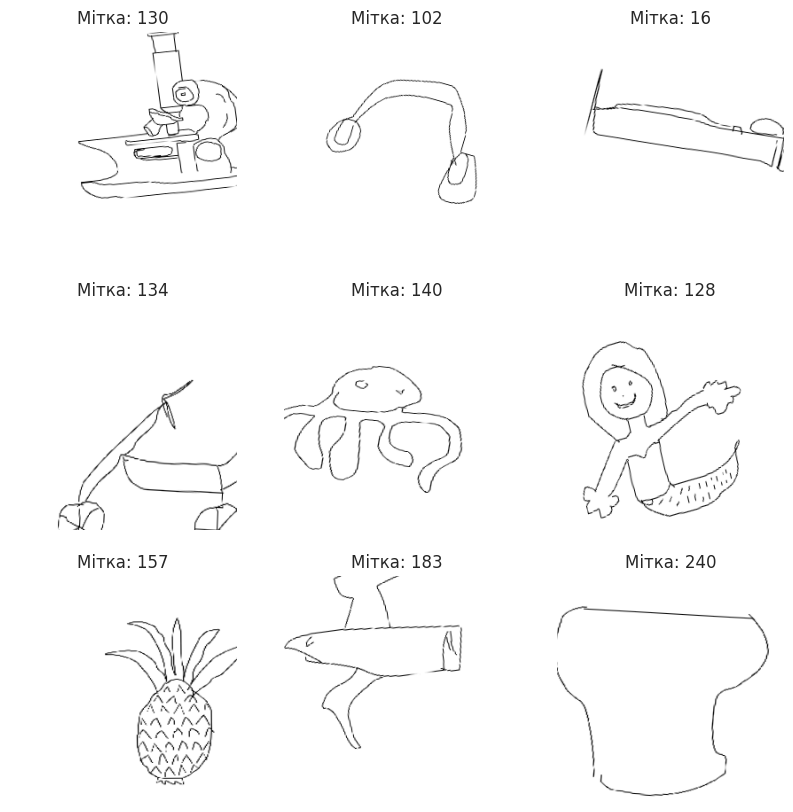

In [139]:
import matplotlib.pyplot as plt

# Отримання батчу з генератора
images, labels = next(train_generator)

# Візуалізація перших 9 зображень
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Мітка: {np.argmax(labels[i])}")
    plt.axis("off")
plt.show()

In [140]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),  # Розмір вхідних зображень
    include_top=False,  # Виключаємо верхній шар (класифікатор)
    weights="imagenet"  # Використовуємо попередньо навчені ваги
)

/tmp/ipykernel_1024/1808916435.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [141]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Заморожуємо базову модель (щоб не навчати її заново)
base_model.trainable = False

# Додавання власних шарів для класифікації
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Глобальне усереднення
x = Dense(1024, activation="relu")(x)  # Повнозв'язний шар
x = Dropout(0.5)(x)  # Dropout для запобігання перенавчанню
predictions = Dense(NUM_CLASSES, activation="softmax")(x)  # Вихідний шар

# Створення моделі
model = Model(inputs=base_model.input, outputs=predictions)

# Компіляція моделі
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Оптимізатор з низьким learning rate
    loss="categorical_crossentropy",  # Функція втрат для багатокласової класифікації
    metrics=["accuracy"]  # Метрика для оцінки
)

In [142]:
# Навчання моделі
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,  # Кількість кроків на епоху
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,  # Кількість кроків для валідації
    epochs=10
)

Epoch 1/10


I0000 00:00:1736955713.889831   19277 service.cc:148] XLA service 0x7f787c002c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736955713.890490   19277 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-01-15 15:41:54.059279: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736955714.805579   19277 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-15 15:41:56.011778: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1680_0', 104 bytes spill stores, 136 bytes spill loads

2025-01-15 15:41:56.256591: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1680_0',

  1/500 ━━━━━━━━━━━━━━━━━━━━ 2:16:40 16s/step - accuracy: 0.0000e+00 - loss: 5.8343

I0000 00:00:1736955726.054016   19277 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.0353 - loss: 5.3310

2025-01-15 15:45:59.220253: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1188', 100 bytes spill stores, 100 bytes spill loads

2025-01-15 15:45:59.228536: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1188', 4 bytes spill stores, 4 bytes spill loads

2025-01-15 15:45:59.595692: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1188', 444 bytes spill stores, 444 bytes spill loads



500/500 ━━━━━━━━━━━━━━━━━━━━ 311s 591ms/step - accuracy: 0.0354 - loss: 5.3301 - val_accuracy: 0.2742 - val_loss: 3.8023
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 274s 547ms/step - accuracy: 0.2046 - loss: 3.7965 - val_accuracy: 0.3800 - val_loss: 2.9940
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 266s 533ms/step - accuracy: 0.3007 - loss: 3.1204 - val_accuracy: 0.4423 - val_loss: 2.6002
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 268s 535ms/step - accuracy: 0.3631 - loss: 2.7537 - val_accuracy: 0.4748 - val_loss: 2.4023
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 274s 547ms/step - accuracy: 0.4065 - loss: 2.5223 - val_accuracy: 0.4985 - val_loss: 2.2467
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 274s 547ms/step - accuracy: 0.4346 - loss: 2.3785 - val_accuracy: 0.5096 - val_loss: 2.1196
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 273s 546ms/step - accuracy: 0.4593 - loss: 2.2336 - val_accuracy: 0.5242 - val_loss: 2.0412
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 276s 553ms/step - accuracy: 0.4865 - loss: 2.10

In [143]:
# Розморожуємо частину шарів базової моделі
for layer in base_model.layers[:100]:  # Розморожуємо перші 100 шарів
    layer.trainable = False
for layer in base_model.layers[100:]:  # Залишаємо замороженими решту шарів
    layer.trainable = True

# Повторна компіляція моделі для fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Ще нижчий learning rate
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-tuning
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=5  # Кількість епох для fine-tuning
)

# 500/500 ━━━━━━━━━━━━━━━━━━━━ 283s 567ms/step - accuracy: 0.5612 - loss: 1.6924 - val_accuracy: 0.6137 - val_loss: 1.5140

Epoch 1/5


2025-01-15 16:28:23.509444: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8124', 104 bytes spill stores, 104 bytes spill loads



500/500 ━━━━━━━━━━━━━━━━━━━━ 316s 592ms/step - accuracy: 0.2695 - loss: 3.3645 - val_accuracy: 0.5270 - val_loss: 1.8767
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 282s 565ms/step - accuracy: 0.4584 - loss: 2.2027 - val_accuracy: 0.5668 - val_loss: 1.7416
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 282s 563ms/step - accuracy: 0.5035 - loss: 1.9762 - val_accuracy: 0.5794 - val_loss: 1.6471
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 285s 569ms/step - accuracy: 0.5328 - loss: 1.8327 - val_accuracy: 0.5910 - val_loss: 1.5892
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 283s 567ms/step - accuracy: 0.5612 - loss: 1.6924 - val_accuracy: 0.6137 - val_loss: 1.5140


In [29]:
model.save(config['training']['final_model_dir'] + "model15.01MobileNetV2.h5")  # Збереження моделі